**Penjelasan dari setiap variabel dalam data**:
1. Outlook: Variabel ini mencerminkan kondisi cuaca pada hari tersebut. Terdapat tiga nilai yang mungkin: "Sunny" (cerah), "Overcast" (berawan), dan "Rainy" (hujan). Variabel ini mempengaruhi keputusan untuk bermain golf (variabel x1).  
2. Temperature: Merupakan suhu udara pada hari tersebut. Terdapat tiga nilai yang mungkin: "Hot" (panas), "Mild" (hangat), dan "Cool" (sejuk). Variabel ini mempengaruhi keputusan untuk bermain golf (variabel x2).   
3. Humidity: Merupakan tingkat kelembapan udara pada hari tersebut. Terdapat dua nilai yang mungkin: "High" (tinggi) dan "Normal" (normal). Variabel ini mempengaruhi keputusan untuk bermain golf (variabel x3).  
4. Wind: Variabel ini mencerminkan kekuatan angin pada hari tersebut. Terdapat dua nilai yang mungkin: "Weak" (lemah) dan "Strong" (kuat). Variabel ini mempengaruhi keputusan untuk bermain golf (variabel x4).  
5. PlayGolf: Variabel target yang ingin diprediksi oleh model. Terdapat dua nilai yang mungkin: "Yes" (ya, bermain golf) dan "No" (tidak, tidak bermain golf). Variabel ini merupakan hasil dari keputusan bermain golf yang dipengaruhi oleh kondisi cuaca seperti yang dijelaskan oleh variabel sebelumnya (variabel y).

## Import Library

In [1]:
import pandas as pd   # Untuk Manipulasi Data
from matplotlib import pyplot as plt # Untuk Visualisasi Data
from sklearn import datasets   # Untuk Pembelajaran Mesin
import sklearn.datasets as datasets  # Untuk Pembelajaran Mesin
from sklearn.model_selection import train_test_split  # Untuk Pra PemrosesanData
from sklearn.ensemble import RandomForestClassifier  # Untuk Pembelajaran Mesin
from sklearn.metrics import classification_report  # Untuk Evaluasi Model
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Untuk Pembelajaran Mesin
from sklearn.preprocessing import LabelEncoder  # UntukPra Pemrosesan Data
import seaborn as sns  # Untuk Visualisasi Data

In [2]:
import warnings  # Mengimpor modul warnings yang digunakan untuk mengelola peringatan dalam Python.

warnings.filterwarnings('ignore')  # Mengatur penanganan peringatan dalam kode.
                                   # Dengan argumen 'ignore', peringatan akan diabaikan dan tidak akan ditampilkan saat program berjalan.


## Import Dataset

In [3]:
df = pd.read_csv('C:/Users/dhiwa/OneDrive/Dokumen/datanyawch/playgolf_data.csv')  #Baca Data CSV
df.head()  #Tampilkan Data Awal


,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes


## Exploration

In [4]:
df.isnull().any() # Cek Data Kosong


Outlook        False
Temperature    False
Humidity       False
Wind           False
PlayGolf       False
dtype: bool

Tidak terdapat missing value pada data

### Check Data Types

In [5]:
df.info()  #Info Data Frame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   PlayGolf     14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


### Check Unique Value

In [6]:
print(df["Outlook"].unique())  #Unik Outlook
print(df["Temperature"].unique())  #Unik Suhu
print(df["Humidity"].unique())  #Unik Kelembapan
print(df["Wind"].unique())  #Unik Angin
print(df["PlayGolf"].unique())  #Unik MainGolf


['Sunny' 'Overcast' 'Rainy']
['Hot' 'Mild' 'Cool']
['High' 'Normal']
['Weak' 'Strong']
['No' 'Yes']


## Dummy Variable

In [7]:
# Mengubah variabel kategorik menjadi dummy variabel

df_getdummy=pd.get_dummies(data=df, columns=['Temperature', 'Humidity', 'Outlook', 'Wind'])
df_getdummy  # Mencetak DataFrame yang telah dimodifikasi

,PlayGolf,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Wind_Strong,Wind_Weak
0,No,False,True,False,True,False,False,False,True,False,True
1,No,False,True,False,True,False,False,False,True,True,False
2,Yes,False,True,False,True,False,True,False,False,False,True
3,Yes,False,False,True,True,False,False,True,False,False,True
4,Yes,True,False,False,False,True,False,True,False,False,True
5,No,True,False,False,False,True,False,True,False,True,False
6,Yes,True,False,False,False,True,True,False,False,True,False
7,No,False,False,True,True,False,False,False,True,False,True
8,Yes,True,False,False,False,True,False,False,True,False,True
9,Yes,False,False,True,False,True,False,True,False,False,True


In [8]:
# Creating a 'features' DataFrame without the 'diagnosis' column for the sake of simplicity
features = df_getdummy.drop(['PlayGolf'], axis=1)

In [9]:
features.shape # Mengembalikan bentuk (shape)

(14, 10)

In [10]:
x=features # Menginisialisasi variabel x dengan nilai dari features
y = df_getdummy['PlayGolf'].values # Menginisialisasi variabel y dengan nilai dari kolom 'PlayGolf' dalam df_getdummy

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4) # Membagi dataset menjadi set pelatihan (x_train, y_train) dan set pengujian (x_test, y_test) dengan rasio 80:20 menggunakan fungsi train_test_split
print ('Train set:', x_train.shape,  y_train.shape[0]) # Mencetak informasi tentang bentuk (shape) 
print ('Test set:', x_test.shape,  y_test.shape[0]) # Mencetak informasi tentang bentuk (shape) 

Train set: (11, 10) 11
Test set: (3, 10) 3


In [11]:
from sklearn import preprocessing # Mengimpor modul preprocessing dari library sklearn
x_train_norm = preprocessing.StandardScaler().fit(x_train).transform(x_train.astype(float)) # Melakukan normalisasi pada x_train menggunakan rata-rata dan standar deviasi yang telah dihitung
x_train_norm[0:5] # Mencetak lima baris pertama dari x_train_norm yang telah dinormalisasi

array([[-0.61237244, -0.75592895,  1.32287566, -0.91287093,  0.91287093,
        -0.61237244,  1.63299316, -0.91287093, -0.91287093,  0.91287093],
       [ 1.63299316, -0.75592895, -0.75592895, -0.91287093,  0.91287093,
         1.63299316, -0.61237244, -0.91287093,  1.09544512, -1.09544512],
       [-0.61237244, -0.75592895,  1.32287566,  1.09544512, -1.09544512,
        -0.61237244,  1.63299316, -0.91287093,  1.09544512, -1.09544512],
       [-0.61237244,  1.32287566, -0.75592895,  1.09544512, -1.09544512,
         1.63299316, -0.61237244, -0.91287093, -0.91287093,  0.91287093],
       [-0.61237244,  1.32287566, -0.75592895,  1.09544512, -1.09544512,
        -0.61237244, -0.61237244,  1.09544512, -0.91287093,  0.91287093]])

## KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier # Mengimpor KNeighborsClassifier dari library sklearn.neighbors
from sklearn.model_selection import GridSearchCV # Import library untuk GridSearchCV
from sklearn.model_selection import KFold # Import library untuk KFold
from sklearn.model_selection import cross_val_score # Import library untuk cross_val_score
from sklearn import metrics # Mengimpor modul metrics dari scikit-learn untuk evaluasi model
import numpy as np # Mengimpor numpy dengan alias np

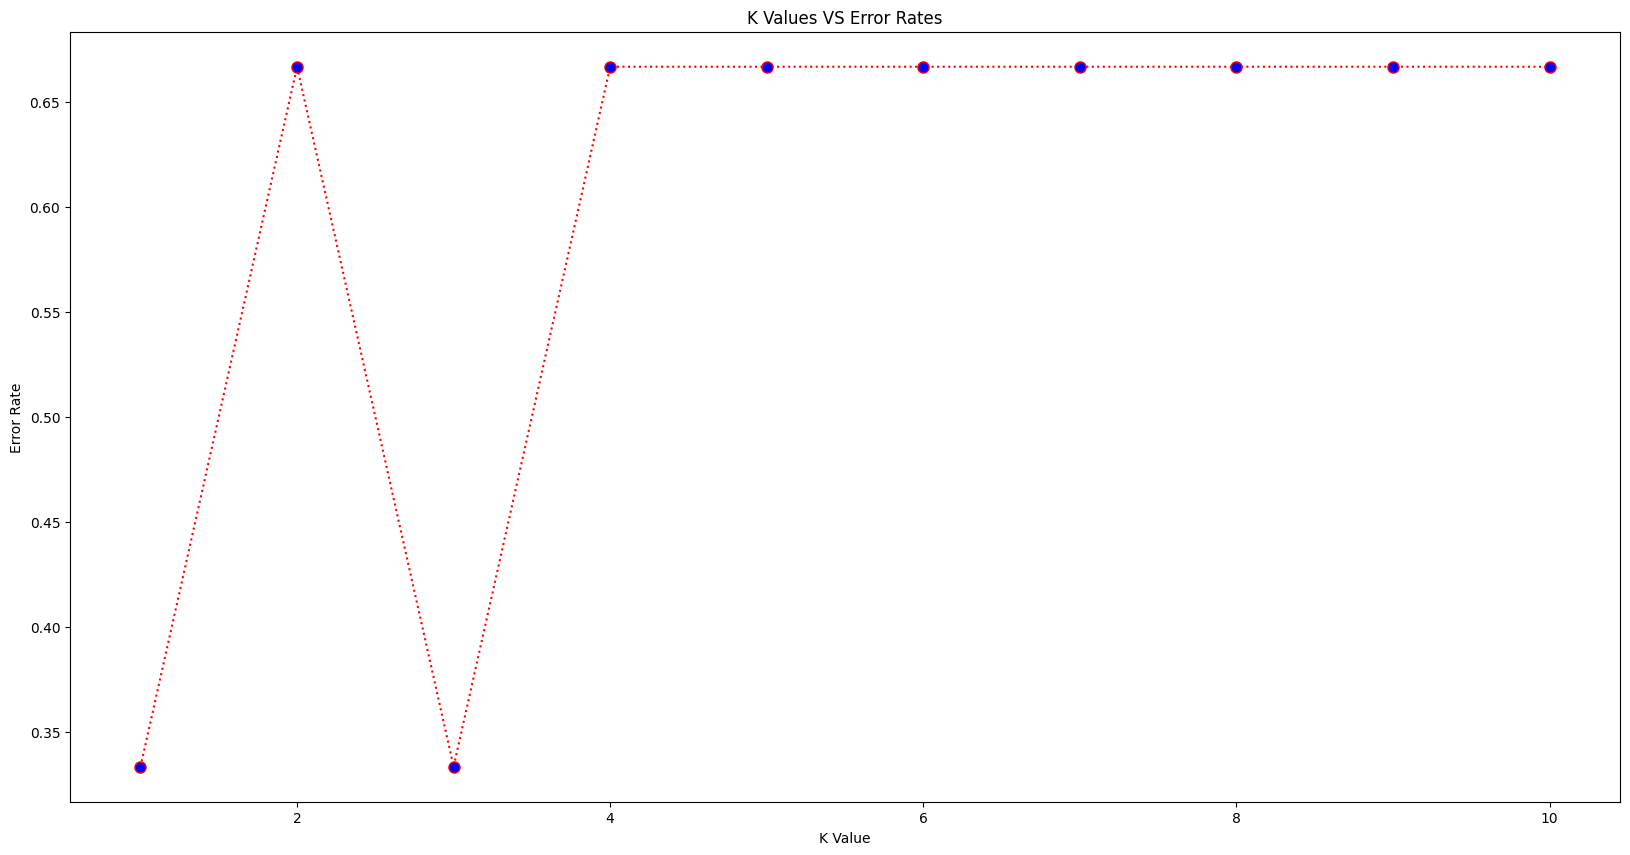

In [13]:
error_rate = [] # Inisialisasi list error_rate untuk menyimpan nilai error rate

# Loop untuk mencari error rate untuk setiap nilai k dari 1 hingga jumlah data training atau 40, yang mana lebih kecil
for i in range(1, min(len(x_train), 40)):
    knn = KNeighborsClassifier(n_neighbors=i) # Membuat objek KNeighborsClassifier dengan jumlah tetangga (k) sebanyak i
    knn.fit(x_train, y_train) # Melatih model knn menggunakan data training
    pred_i = knn.predict(x_test) # Memprediksi nilai target (y) menggunakan data test
    error_rate.append(np.mean(pred_i != y_test)) # Menghitung error rate dan menyimpannya dalam list error_rate

# Menampilkan plot dari error rate untuk setiap nilai k
plt.figure(figsize=(20, 10))
plt.plot(range(1, min(len(x_train), 40)), error_rate, color='red', linestyle='dotted', marker='o', markerfacecolor='blue', markersize=8)
plt.title('K Values VS Error Rates')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()


Interpretasi :

Dari grafik di atas, nilai K yang memiliki tingkat kesalahan paling rendah adalah sekitar 1 dan 3

In [14]:
# Menghitung nilai awal untuk k, biasanya diambil sebagai akar kuadrat dari jumlah observasi
initial_k = np.sqrt(len(df_getdummy))
print("Initial value for k:", initial_k)

Initial value for k: 3.7416573867739413


Interpretasi :     

Karena nilai inisial K yang diperoleh sebesar 3.7416573867739413, sehingga nilai K yang akan digunakan adalah 3 dan 4.

In [15]:
# Membuat objek KNN classifier
knn = KNeighborsClassifier()

# Membuat dictionary dengan daftar nilai k yang akan diuji
param_grid = {'n_neighbors': np.arange(1, 21)}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Melatih GridSearchCV
grid_search.fit(x_train_norm, y_train)

# Menampilkan nilai k terbaik
print("Nilai k terbaik:", grid_search.best_params_['n_neighbors'])


Nilai k terbaik: 5


### Training

In [16]:
k = 3
# Inisialisasi objek KNeighborsClassifier dengan jumlah tetangga (k) sebanyak 3 dan melatih model menggunakan data training yang sudah dinormalisasi
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train_norm,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [17]:
# Menggunakan StandardScaler untuk melakukan normalisasi terhadap data test
x_test_norm = preprocessing.StandardScaler().fit(x_test).transform(x_test.astype(float))
x_test_norm[0:5]

array([[ 1.41421356,  0.        , -1.41421356, -1.41421356,  1.41421356,
        -0.70710678,  0.70710678,  0.        , -0.70710678,  0.70710678],
       [-0.70710678,  0.        ,  0.70710678,  0.70710678, -0.70710678,
        -0.70710678,  0.70710678,  0.        , -0.70710678,  0.70710678],
       [-0.70710678,  0.        ,  0.70710678,  0.70710678, -0.70710678,
         1.41421356, -1.41421356,  0.        ,  1.41421356, -1.41421356]])

### Predicting

In [18]:
yhat = neigh.predict(x_test_norm) # Menggunakan model yang telah dilatih untuk membuat prediksi terhadap data uji
yhat[0:5] # Menampilkan lima hasil prediksi pertama

array(['Yes', 'No', 'Yes'], dtype=object)

### Accuracy Test

In [19]:
# Menghitung akurasi model terhadap data latih
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train_norm)))
# Menghitung akurasi model terhadap data uji
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7272727272727273
Test set Accuracy:  0.6666666666666666


Interpretasi :

Bahwa model memiliki akurasi sebesar 72.73% pada data train dan model memiliki akurasi sebesar 66.67% pada data uji

### Different K

In [20]:
Ks = 5 # Jumlah nilai k yang akan dievaluasi
mean_acc = np.zeros((Ks-1)) # Inisialisasi array untuk menyimpan rata-rata akurasi untuk setiap nilai k
std_acc = np.zeros((Ks-1)) # Inisialisasi array untuk menyimpan standar deviasi akurasi untuk setiap nilai k

for n in range(1,Ks):
    # Membuat model k-NN dengan jumlah tetangga sebanyak n dan melatihnya pada data latih yang sudah dinormalisasi
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train_norm,y_train)
    yhat=neigh.predict(x_test_norm) # Menggunakan model untuk membuat prediksi pada data uji yang sudah dinormalisasi
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) # Menghitung akurasi model untuk nilai k=n
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0]) # Menghitung standar deviasi akurasi (untuk mendapatkan interval kepercayaan)

mean_acc # Menampilkan rata-rata akurasi untuk setiap nilai k dari 1 hingga Ks-1

array([0.33333333, 0.        , 0.66666667, 0.33333333])

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)  # Menyesuaikan jumlah neigbors

k_folds = 3 # Menentukan jumlah lipatan (k)

kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)  # Membuat objek KFold dengan mengacak data

scores = cross_val_score(knn, x_train_norm, y_train, cv=kf) # Melakukan cross validation k-fold

print("Cross-Validation Scores:", scores) # Menghasilkan output skor cross validation

mean_accuracy = scores.mean() # Menghitung dan print akurasi rata-rata
print("Mean Accuracy:", mean_accuracy)

Cross-Validation Scores: [0.5        0.25       0.66666667]
Mean Accuracy: 0.47222222222222215


### Plot the model accuracy for a different number of neighbors

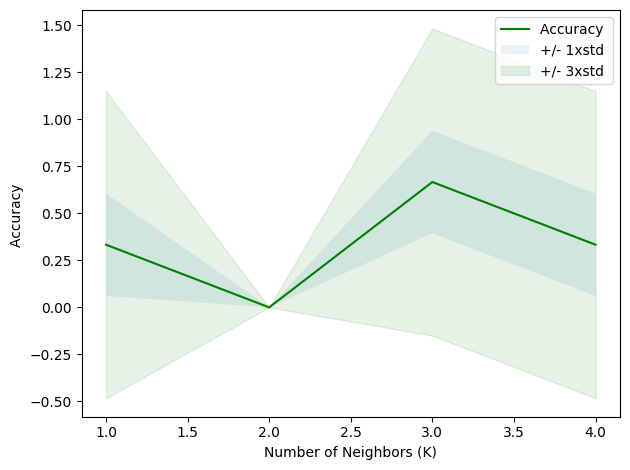

In [22]:
plt.plot(range(1,Ks),mean_acc,'g') # Menampilkan plot garis untuk akurasi rata-rata terhadap jumlah tetangga (K)
# Mengisi area di sekitar garis akurasi rata-rata dengan lebar standar deviasi
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd')) # Menambahkan legend untuk plot
plt.ylabel('Accuracy ') # Memberi label sumbu-y
plt.xlabel('Number of Neighbors (K)') # Memberi label sumbu-x
plt.tight_layout() # Menyusun plot agar rapi
plt.show() # Menampilkan plot

Interpretasi :    

Dari grafik diatas dapat diketahui bahwa akurasi terbaik adalah dengan 60% dengan k = 3